In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import plotly.express as px

# reading csv file, containing convid19 info about all the countries
df_covid19 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")

# getting jus the fields we actually need
df_covid19 = df_covid19.drop(["People_Tested","People_Hospitalized","UID","ISO3","Mortality_Rate"],axis =1)

# indexed countries
df_countries = df_covid19.copy().drop(['Lat','Long_','Last_Update'],axis =1)
df_countries.index = df_countries["Country_Region"]
df_countries = df_countries.drop(['Country_Region'], axis=1)

In [2]:
# getting the data from people all around the world

df_t = pd.DataFrame(pd.to_numeric(df_countries.sum()),dtype=np.float64).transpose()
df_t["Mortality Rate (per 100)"] = np.round(100*df_t["Deaths"]/df_t["Confirmed"],2)
df_t.style.background_gradient(cmap='Wistia',axis=1).format("{:.2f}").format("{:.0f}",subset=["Confirmed","Deaths","Recovered","Active"])

,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality Rate (per 100)
0,7807734,430530,3721282,3586251,30071.21,5.51


In [3]:
# displaying data by countries ordered by confirmed cases
df_countries["Mortality Rate (per 100)"] = np.round(100*df_countries["Deaths"]/df_countries["Confirmed"],2)
df_countries.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='Reds',subset=["Confirmed"])\
                        .background_gradient(cmap='Greys',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Blues',subset=["Active"])\
                        .background_gradient(cmap='Greys',subset=["Incident_Rate"])\
                        .background_gradient(cmap='YlOrRd',subset=["Mortality Rate (per 100)"])\
                        .format("{:.2f}")\
                        .format("{:.0f}",subset=["Confirmed","Deaths","Recovered","Active"])



C:\Users\Dima\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality Rate (per 100)
Country_Region,,,,,,
US,2074526,115436,556606,1332813,629.66,5.56
Brazil,850514,42720,459436,348358,400.13,5.02
Russia,528267,6938,279536,241793,361.99,1.31
India,320922,9195,162379,149348,23.26,2.87
United Kingdom,295828,41747,1283,252798,435.77,14.11
Spain,243605,27136,150376,66093,521.03,11.14
Italy,236651,34301,174865,27485,391.41,14.49
Peru,220749,6308,111724,102717,669.51,2.86
France,193746,29401,72931,91414,296.82,15.18


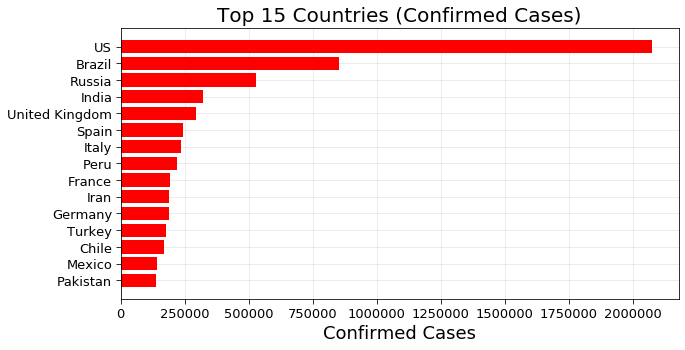

In [4]:
# displaying top 15 countries by confirmed cases

figure_confirmed = plt.figure(figsize=(10,5))
figure_confirmed.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries.sort_values('Confirmed')["Confirmed"].index[-15:],df_countries.sort_values('Confirmed')["Confirmed"].values[-15:],color="red")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 15 Countries (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.3)

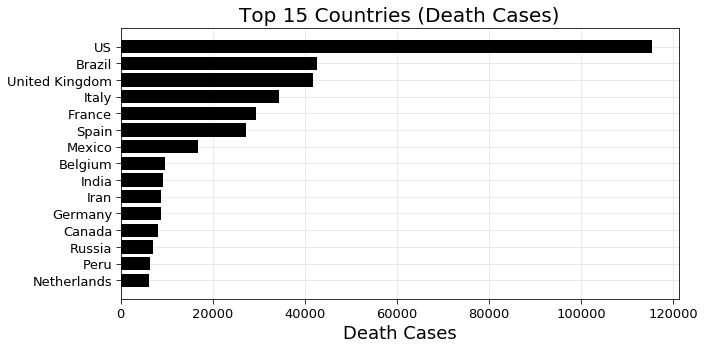

In [5]:
# displaying top 15 countries by deaths cases

figure_deaths = plt.figure(figsize=(10,5))
figure_deaths.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries.sort_values('Deaths')["Deaths"].index[-15:],df_countries.sort_values('Deaths')["Deaths"].values[-15:],color="black")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Death Cases",fontsize=18)
plt.title("Top 15 Countries (Death Cases)",fontsize=20)
plt.grid(alpha=0.3)

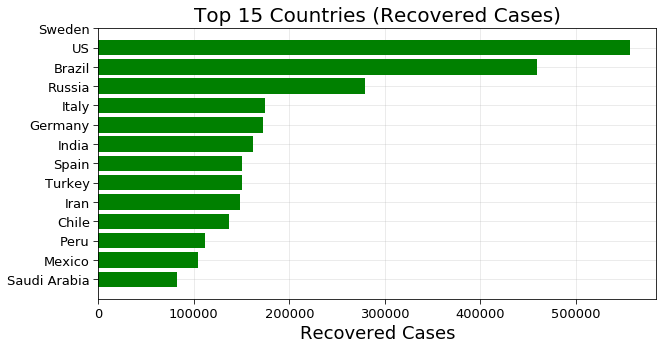

In [6]:
# displaying top 15 countries by recovered cases

figure_recovers = plt.figure(figsize=(10,5))
figure_recovers.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries.sort_values('Recovered')["Recovered"].index[-15:],df_countries.sort_values('Recovered')["Recovered"].values[-15:],color="green")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Recovered Cases",fontsize=18)
plt.title("Top 15 Countries (Recovered Cases)",fontsize=20)
plt.grid(alpha=0.3)

In [7]:
# displaying top 15 countries by confirmed cases and combining with the country`s health level

medical_rating = pd.read_csv("data/medical_system.csv")
medical_rating = medical_rating.copy().drop(['Health Distribution','Overall goal attainment', 'Health expenditure per capita in international dollars'],axis =1)

medical_rating.index = medical_rating["Country"]

medical_rating = medical_rating.drop(['Country'], axis=1)
medical_rating = medical_rating.sort_values('Health Level')

df_confirmed_cases = df_countries.sort_values('Confirmed', ascending= False)["Confirmed"].head(15)

confirmed_health_df = pd.merge(df_confirmed_cases, medical_rating, left_index=True, right_index=True)

confirmed_health_df.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='Reds',subset=["Confirmed"])\
                        .background_gradient(cmap='Greens',subset=["Health Level"])\
                        .background_gradient(cmap='Greens',subset=["On level of health"])\
                        .background_gradient(cmap='Blues',subset=["Overall health system performance"])\
                        .format("{:.2f}")\
                        .format("{:.0f}",subset=["Confirmed","Health Level","On level of health","Overall health system performance"])

,Confirmed,Health Level,On level of health,Overall health system performance
US,2074526,24,72,37
Brazil,850514,111,78,125
Russia,528267,91,127,130
India,320922,19,118,112
United Kingdom,295828,14,24,18
Spain,243605,5,6,7
Italy,236651,6,3,2
Peru,220749,105,119,129
France,193746,3,4,1
Iran,187427,96,58,93


In [8]:
#combining all cases with countries population to see the whole pic3ture

population = pd.read_csv("data/population_by_country.csv")
population.index = population["Country"]
population = population["Population"]

df_confirmed_cases = df_countries.sort_values('Confirmed', ascending= False)

confirmed_population = pd.merge(df_confirmed_cases, population, left_index=True, right_index=True)

confirmed_population["% Confirmed"] = 100*confirmed_population["Confirmed"]/confirmed_population["Population"]
confirmed_population["% Active"] = 100*confirmed_population["Active"]/confirmed_population["Population"]
confirmed_population["% Recovered"] = 100*confirmed_population["Recovered"]/confirmed_population["Population"]
confirmed_population["% Deaths"] = 100*confirmed_population["Deaths"]/confirmed_population["Population"]

confirmed_population_top_countries = confirmed_population.copy().drop(['Confirmed','Recovered','Deaths', 'Incident_Rate', 'Active'],axis=1).head(25)

confirmed_population_top_countries.style.background_gradient(cmap='Blues',subset=["Population"])\
                        .background_gradient(cmap='Reds',subset=["% Confirmed"])\
                        .background_gradient(cmap='YlOrBr',subset=["% Active"])\
                        .background_gradient(cmap='Greens',subset=["% Recovered"])\
                        .background_gradient(cmap='YlOrRd',subset=["% Deaths"])\
                        .format("{:.3f}")

,Mortality Rate (per 100),Population,% Confirmed,% Active,% Recovered,% Deaths
US,5.560,330610570.000,0.627,0.403,0.168,0.035
Brazil,5.020,212253150.000,0.401,0.164,0.216,0.020
Russia,1.310,145922010.000,0.362,0.166,0.192,0.005
India,2.870,1377233523.000,0.023,0.011,0.012,0.001
United Kingdom,14.110,67814098.000,0.436,0.373,0.002,0.062
Spain,11.140,46751175.000,0.521,0.141,0.322,0.058
Italy,14.490,60479424.000,0.391,0.045,0.289,0.057
Peru,2.860,32876986.000,0.671,0.312,0.340,0.019
France,15.180,65244628.000,0.297,0.140,0.112,0.045
Iran,4.710,83771587.000,0.224,0.036,0.177,0.011


In [9]:
# Ordering by % of citizens confirmed cases

confirmed_population_by_confirmed = confirmed_population.copy().sort_values('% Confirmed', ascending=False).drop(['Confirmed', 'Recovered','Deaths', 'Incident_Rate', 'Active'],axis=1).head(15)

confirmed_population_by_confirmed.style.background_gradient(cmap='Blues',subset=["Population"])\
                        .background_gradient(cmap='Reds',subset=["% Confirmed"])\
                        .background_gradient(cmap='YlOrBr',subset=["% Active"])\
                        .background_gradient(cmap='Greens',subset=["% Recovered"])\
                        .background_gradient(cmap='YlOrRd',subset=["% Deaths"])\
                        .format("{:.3f}")

,Mortality Rate (per 100),Population,% Confirmed,% Active,% Recovered,% Deaths
Qatar,0.090,2870922.000,2.731,0.804,1.925,0.002
San Marino,6.050,33917.000,2.046,0.389,1.533,0.124
Holy See,0.000,801.000,1.498,0.000,1.498,0.000
Andorra,5.980,77240.000,1.104,0.027,1.011,0.066
Bahrain,0.220,1688629.000,1.079,0.318,0.759,0.002
Chile,1.850,19082804.000,0.877,0.141,0.719,0.016
Kuwait,0.820,4257495.000,0.844,0.208,0.629,0.007
Singapore,0.060,5840996.000,0.695,0.202,0.493,0.000
Peru,2.860,32876986.000,0.671,0.312,0.340,0.019
Luxembourg,2.710,623861.000,0.651,0.005,0.629,0.018


In [10]:
# Ordering by % of citizens deaths cases

confirmed_population_by_deaths = confirmed_population.copy().sort_values('% Deaths', ascending=False).drop(['Confirmed','Recovered','Deaths', 'Incident_Rate', 'Active'],axis=1).head(15)

confirmed_population_by_deaths.style.background_gradient(cmap='Blues',subset=["Population"])\
                        .background_gradient(cmap='Reds',subset=["% Confirmed"])\
                        .background_gradient(cmap='YlOrBr',subset=["% Active"])\
                        .background_gradient(cmap='Greens',subset=["% Recovered"])\
                        .background_gradient(cmap='YlOrRd',subset=["% Deaths"])\
                        .format("{:.3f}")

,Mortality Rate (per 100),Population,% Confirmed,% Active,% Recovered,% Deaths
San Marino,6.050,33917.000,2.046,0.389,1.533,0.124
Belgium,16.110,11579477.000,0.517,0.291,0.143,0.083
Andorra,5.980,77240.000,1.104,0.027,1.011,0.066
United Kingdom,14.110,67814098.000,0.436,0.373,0.002,0.062
Spain,11.140,46751175.000,0.521,0.141,0.322,0.058
Italy,14.490,60479424.000,0.391,0.045,0.289,0.057
Sweden,9.570,10086531.000,0.505,0.457,nan,0.048
France,15.180,65244628.000,0.297,0.140,0.112,0.045
Netherlands,12.440,17127290.000,0.285,0.249,0.001,0.035
US,5.560,330610570.000,0.627,0.403,0.168,0.035


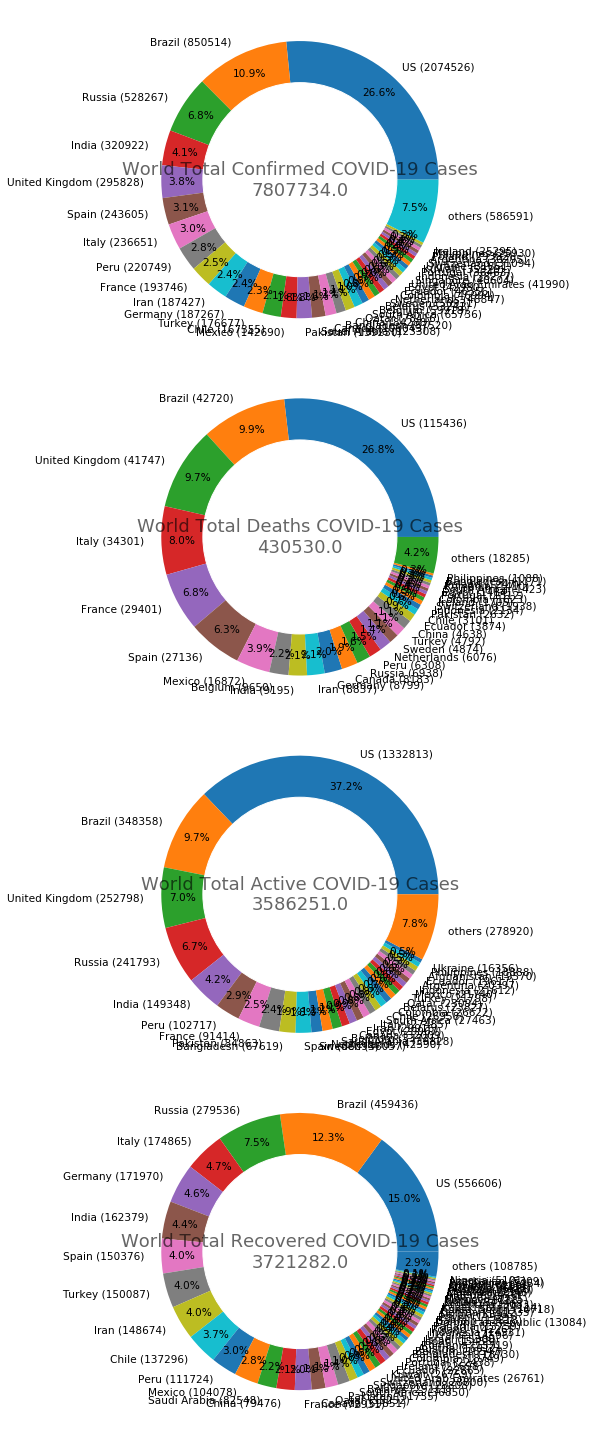

In [11]:
number_of_rows = 4
figure_result = plt.figure(figsize=(10,5*number_of_rows))

stats = [df_covid19.loc[:,['Country_Region','Confirmed']],df_covid19.loc[:,['Country_Region','Deaths']],df_covid19.loc[:,['Country_Region','Active']],df_covid19.loc[:,['Country_Region','Recovered']]]
label = ["Confirmed","Deaths","Active","Recovered"]
threshold = [25000,1000,15000,5000]
for i, stat in enumerate(stats):
    plt.tight_layout()
    df_countries = stat.groupby(["Country_Region"]).sum()
    df_countries = df_countries.sort_values(df_countries.columns[-1],ascending= False)
    others = df_countries[df_countries[df_countries.columns[-1]] < threshold[i] ].sum()[-1]
    df_countries = df_countries[df_countries[df_countries.columns[-1]] > threshold[i]]
    df_countries = df_countries[df_countries.columns[-1]]
    df_countries["others"] = others
    labels = [df_countries.index[i] +" (" + str(int(df_countries[i])) +") "for i in range(df_countries.shape[0])]

    ax = figure_result.add_subplot(rows,1,i+1)
    plt.pie(df_countries, labels=labels,autopct='%1.1f%%',pctdistance=0.85, labeldistance=1.1,textprops = {'fontsize':10.5})
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.text(0.5,0.5,"World Total "+label[i]+ " COVID-19 Cases\n"+str(stat.sum().values[1]), horizontalalignment='center',verticalalignment='center',transform=ax.transAxes, size=18, alpha = 0.6)


plt.show()